In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import power_anova 

In [11]:
data = pd.read_excel('all_cohorts_freezing_FINAL.xlsx')
data = data[data['els'] == 'y']
data.head()

,freezing,genotype,id,day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,els,psilocybin
832,33.967833,wt,922-1,sefla,control,male,els1,NaN,NaN,2022-02-17,NaN,y,n
833,4.953667,wt,922-2,sefla,control,male,els1,NaN,NaN,2022-02-17,NaN,y,n
834,16.064667,wt,922-3,sefla,control,male,els1,NaN,NaN,2022-02-17,NaN,y,n
835,0.274167,wt,922-4,sefla,control,male,els1,NaN,NaN,2022-02-17,NaN,y,n
836,1.075500,wt,922-5,sefla,control,male,els1,NaN,NaN,2022-02-17,NaN,y,n


In [90]:
# filtered_data = data[data['id'].map(data['id'].value_counts()) < 7]
# filtered_data


In [91]:
#take out the sefla stage for better comparison between groups 
subset_data = data[~((data['day'] == 'sefla') | (data['day'] == 'recall6'))]
subset_sefl = subset_data[subset_data['condition'] == 'sefl']
subset_control = subset_data[subset_data['condition'] == 'control']

In [92]:
print("There are {} rats in the sefl group".format(len(subset_sefl['id'].value_counts())))
print("There are {} rats in the control group".format(len(subset_control['id'].value_counts())))

There are 22 rats in the sefl group
There are 24 rats in the control group


/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


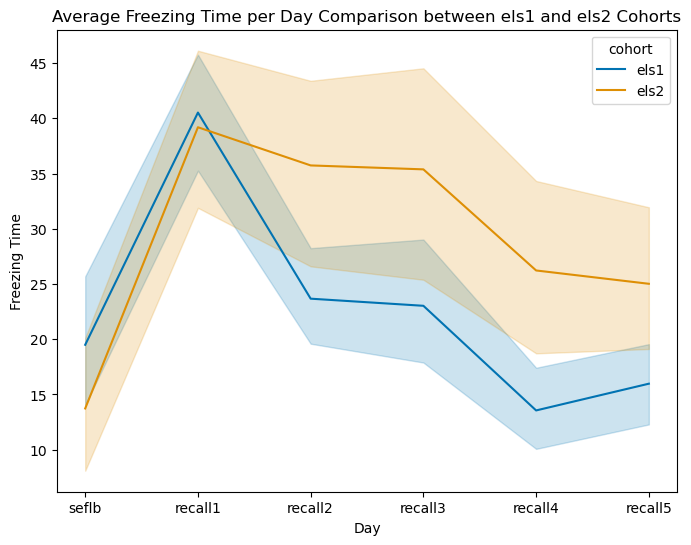

In [64]:
# lineplot for mean freezing time per day for els1 and els2 cohorts 
plt.figure(figsize=(8, 6))
sns.lineplot(data=subset_data, x='day', y='freezing', hue='cohort', palette="colorblind")
plt.xlabel('Day')
plt.ylabel('Freezing Time')
plt.title('Average Freezing Time per Day Comparison between els1 and els2 Cohorts')
plt.show()


/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


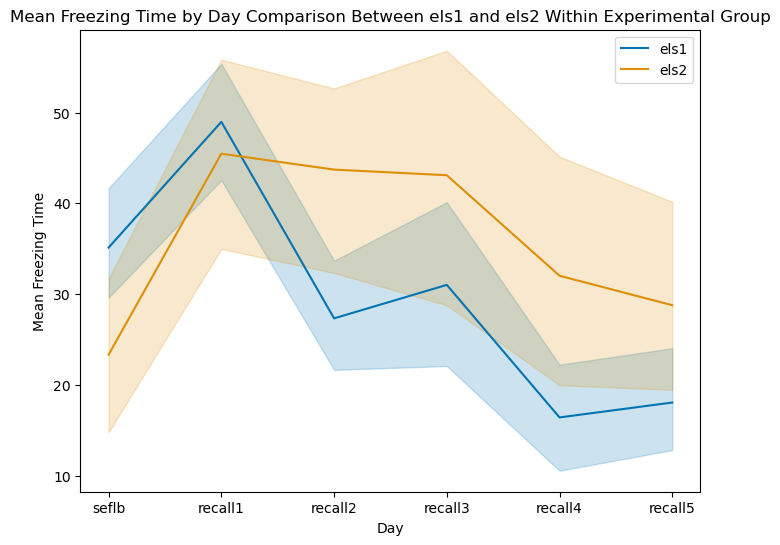

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


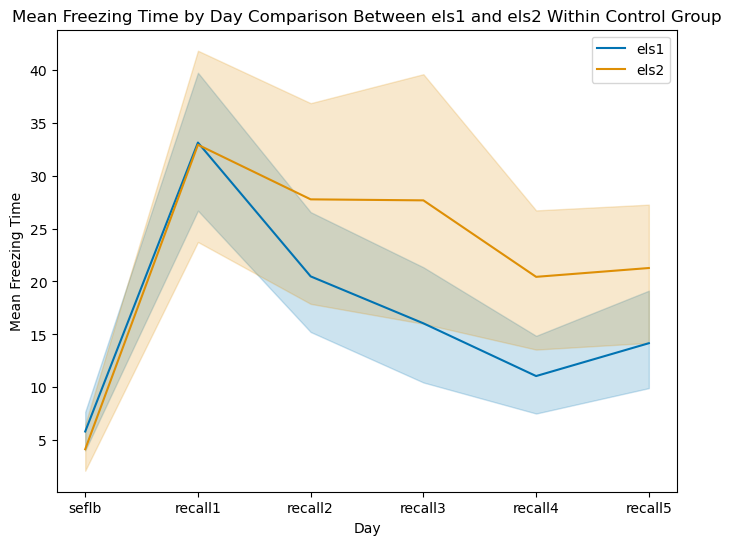

In [93]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=subset_sefl, x='day', y='freezing', hue='cohort', palette="colorblind")
plt.xlabel('Day')
plt.ylabel('Mean Freezing Time')
plt.title('Mean Freezing Time by Day Comparison Between els1 and els2 Within Experimental Group')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(data=subset_control, x='day', y='freezing', hue='cohort', palette="colorblind")
plt.xlabel('Day')
plt.ylabel('Mean Freezing Time')
plt.title('Mean Freezing Time by Day Comparison Between els1 and els2 Within Control Group')
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# sns.violinplot(data=subset_sefl, x='day', y='freezing', hue='cohort', palette="colorblind", split=True)
# plt.xlabel('Day')
# plt.ylabel('Freezing Time')
# plt.title('Mean Freezing Time by Day Comparison Between els1 and els2 Within Experimental Group')
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.violinplot(data=subset_control, x='day', y='freezing', hue='cohort', palette="colorblind", split=True)
# plt.xlabel('Day')
# plt.ylabel('Freezing Time')
# plt.title('Mean Freezing Time by Day Comparison Between els1 and els2 Within Experimental Group')
# plt.show()

In [94]:
# ANOVA on freezing time between els1 and els2 within experimental group
experimental_model = pg.mixed_anova(data=subset_sefl, dv='freezing', within='day', between='cohort', subject='id', effsize="np2")
print("repeated ANOVA for Freezing Time within Experimental Group between els1 and els groups:")
print(experimental_model)
print('The required sample size per group n: %.4f' % power_anova(eta_squared=experimental_model['np2'].iloc[0], k=2, power=0.80))
## we do not observe statistical significance between els1 and els2 groups within the experimental group, and we do not meet the required sample size. 

# ANOVA on freezing time between els1 and els2 within control group
control_model = pg.mixed_anova(data=subset_control, dv='freezing', within='day', between='cohort', subject='id', effsize="np2")
print("repeated ANOVA for Freezing Time within Control Group between els1 and els groups:")
print(control_model)
print('The required sample size per group n: %.4f' % power_anova(eta_squared=control_model['np2'].iloc[0], k=2, power=0.80))
## we do not observe statistical significance between els1 and els2 groups within the control group either, and we do not meet the required sample size. 

print("There are {} rats in the sefl group".format(len(subset_sefl['id'].value_counts())))
print("There are {} rats in the control group".format(len(subset_control['id'].value_counts())))

repeated ANOVA for Freezing Time within Experimental Group between els1 and els groups:
        Source            SS  DF1  DF2           MS          F         p-unc  \
0       cohort   1323.770084    1   20  1323.770084   1.899029  1.834107e-01   
1          day  10127.557332    5  100  2025.511466  16.288982  9.940645e-12   
2  Interaction   3384.738616    5  100   676.947723   5.443953  1.797479e-04   

   p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0        NaN  0.086718       NaN        NaN       NaN       NaN  
1   0.000002  0.448869  0.545298      False  0.153322  0.001197  
2        NaN  0.213959       NaN        NaN       NaN       NaN  
The required sample size per group n: 42.3130
repeated ANOVA for Freezing Time within Control Group between els1 and els groups:
        Source            SS  DF1  DF2           MS          F         p-unc  \
0       cohort    996.993579    1   22   996.993579   2.202103  1.520094e-01   
1          day  10336.863402    5  110

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


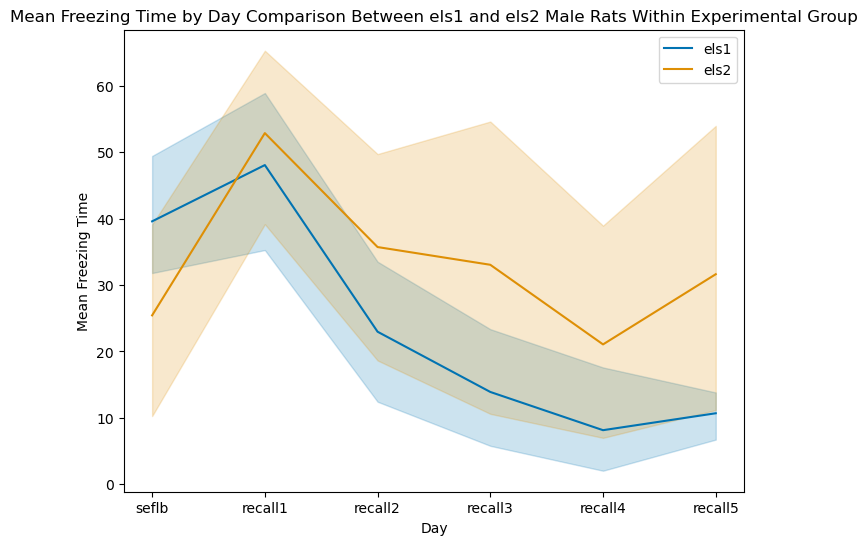

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


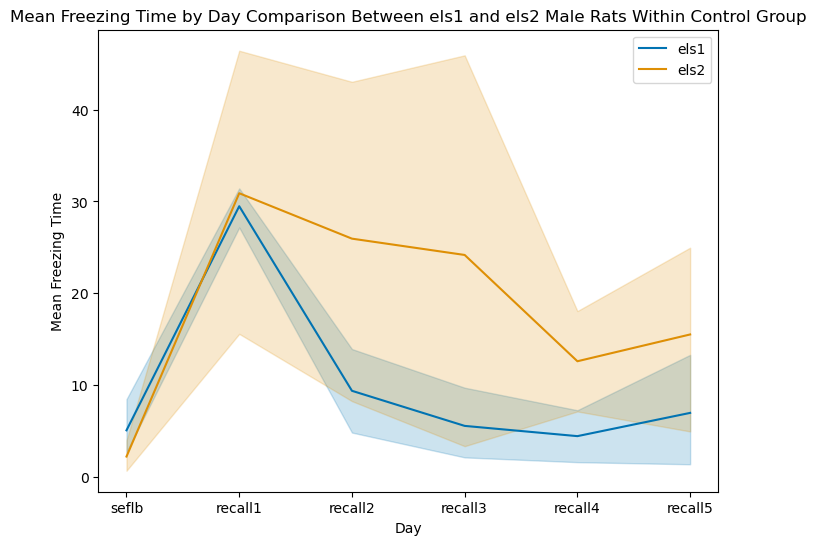

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


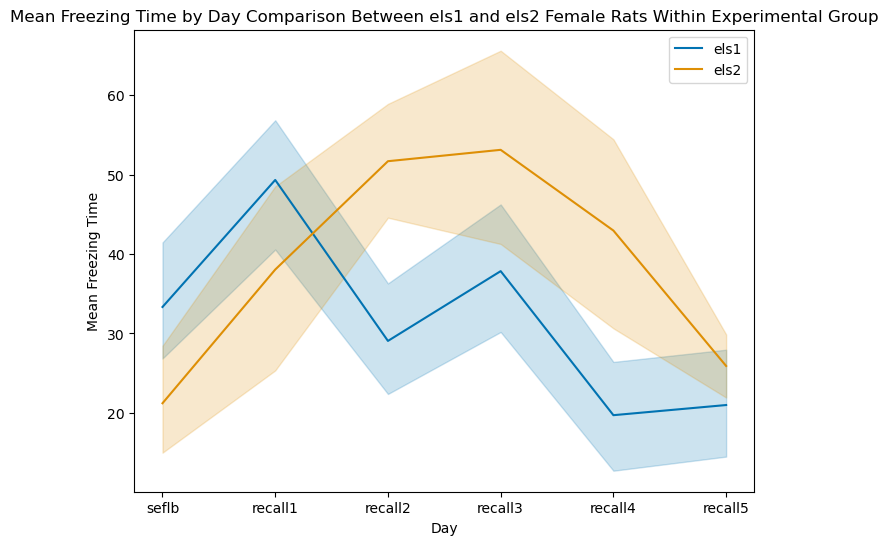

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


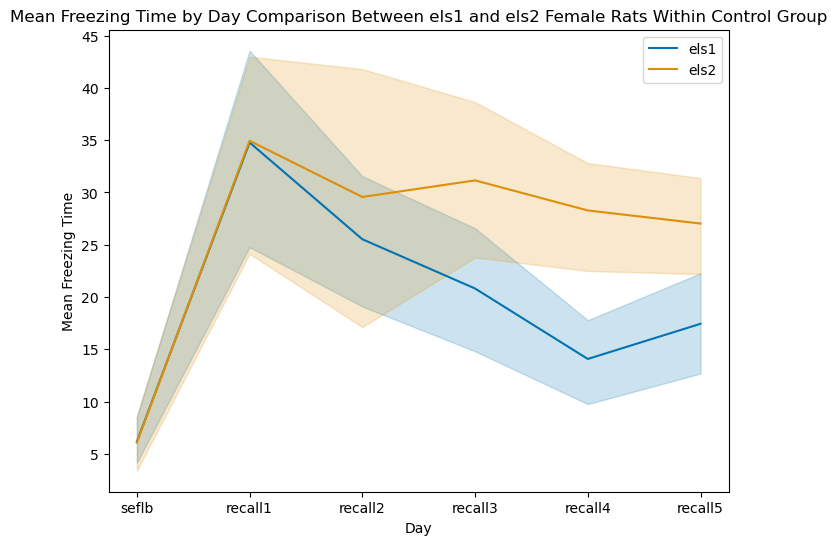

In [83]:
# Graphics for freezing time difference between els1 and els2 within experimental group and control group separating by sex  

plt.figure(figsize=(8, 6))
sns.lineplot(data=subset_sefl[subset_sefl['sex']=='male'], x='day', y='freezing', hue='cohort', palette="colorblind")
plt.xlabel('Day')
plt.ylabel('Mean Freezing Time')
plt.title('Mean Freezing Time by Day Comparison Between els1 and els2 Male Rats Within Experimental Group')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(data=subset_control[subset_control['sex']=='male'], x='day', y='freezing', hue='cohort', palette="colorblind")
plt.xlabel('Day')
plt.ylabel('Mean Freezing Time')
plt.title('Mean Freezing Time by Day Comparison Between els1 and els2 Male Rats Within Control Group')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(data=subset_sefl[subset_sefl['sex']=='female'], x='day', y='freezing', hue='cohort', palette="colorblind")
plt.xlabel('Day')
plt.ylabel('Mean Freezing Time')
plt.title('Mean Freezing Time by Day Comparison Between els1 and els2 Female Rats Within Experimental Group')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(data=subset_control[subset_control['sex']=='female'], x='day', y='freezing', hue='cohort', palette="colorblind")
plt.xlabel('Day')
plt.ylabel('Mean Freezing Time')
plt.title('Mean Freezing Time by Day Comparison Between els1 and els2 Female Rats Within Control Group')
plt.legend()
plt.show()

In [108]:
# ANOVA on freezing time between els1 and els2 male rats within experimental group
exp_male = pg.mixed_anova(data=subset_sefl[subset_sefl['sex']=='male'], dv='freezing', within='day', between='cohort', subject='id', effsize="np2")
print("repeated ANOVA for Freezing Time within Experimental Group between els1 and els groups:")
print(exp_male)
print('The required sample size per group n: %.4f' % power_anova(eta_squared=exp_male['np2'].iloc[0], k=2, power=0.80))
## we do not observe statistical significance between els1 and els2 groups within the experimental group, and we do not meet the required sample size. 

# ANOVA on freezing time between els1 and els2 male rats within control group
control_male = pg.mixed_anova(data=subset_control[subset_control['sex']=='male'], dv='freezing', within='day', between='cohort', subject='id', effsize="np2")
print("repeated ANOVA for Freezing Time within Control Group between els1 and els groups:")
print(control_male)
print('The required sample size per group n: %.4f' % power_anova(eta_squared=control_male['np2'].iloc[0], k=2, power=0.80))
## we do not observe statistical significance between els1 and els2 groups within the control group either, and we do not meet the required sample size. 

print("There are {first} male rats in els1 and {second} male rats in els2 that are in the sefl group ".format(first=len(subset_sefl[(subset_sefl['sex']=='male') & (subset_sefl['cohort']=='els1')]['id'].value_counts())
, second=len(subset_sefl[(subset_sefl['sex']=='male') & (subset_sefl['cohort']=='els2')]['id'].value_counts())))
print("There are {first} male rats in els1 and {second} male rats in els2 that are in the control group ".format(first=len(subset_control[(subset_control['sex']=='male') & (subset_control['cohort']=='els1')]['id'].value_counts())
, second=len(subset_control[(subset_control['sex']=='male') & (subset_control['cohort']=='els2')]['id'].value_counts())))

repeated ANOVA for Freezing Time within Experimental Group between els1 and els groups:
        Source           SS  DF1  DF2           MS          F         p-unc  \
0       cohort  1060.169605    1    6  1060.169605   0.886760  3.827080e-01   
1          day  6171.156384    5   30  1234.231277  14.084754  4.053442e-07   
2  Interaction  1655.138809    5   30   331.027762   3.777610  9.006830e-03   

   p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0        NaN  0.128763       NaN        NaN       NaN       NaN  
1   0.003939  0.701266  0.331207      False  0.002196  0.009308  
2        NaN  0.386353       NaN        NaN       NaN       NaN  
The required sample size per group n: 27.5476
repeated ANOVA for Freezing Time within Control Group between els1 and els groups:
        Source           SS  DF1  DF2          MS          F         p-unc  \
0       cohort   942.442450    1    7  942.442450   2.021034  1.981199e-01   
1          day  3748.768510    5   35  749.753

In [114]:
# ANOVA on freezing time between els1 and els2 female rats within experimental group
exp_female = pg.mixed_anova(data=subset_sefl[subset_sefl['sex']=='female'], dv='freezing', within='day', between='cohort', subject='id', effsize="np2")
print("repeated ANOVA for Freezing Time within Experimental Group between els1 and els groups:")
print(exp_female)
print('The required sample size per group n: %.4f' % power_anova(eta_squared=exp_female['np2'].iloc[0], k=2, power=0.80))
## we do not observe statistical significance between els1 and els2 groups within the experimental group, and we do not meet the required sample size. 

# ANOVA on freezing time between els1 and els2 female rats within control group
control_female = pg.mixed_anova(data=subset_control[subset_control['sex']=='female'], dv='freezing', within='day', between='cohort', subject='id', effsize="np2")
print("repeated ANOVA for Freezing Time within Control Group between els1 and els groups:")
print(control_female)
print('The required sample size per group n: %.4f' % power_anova(eta_squared=control_female['np2'].iloc[0], k=2, power=0.80))
## we do not observe statistical significance between els1 and els2 groups within the control group either, and we do not meet the required sample size. 

print("There are {first} female rats in els1 and {second} female rats in els2 that are in the sefl group ".format(first=len(subset_sefl[(subset_sefl['sex']=='female') & (subset_sefl['cohort']=='els1')]['id'].value_counts())
, second=len(subset_sefl[(subset_sefl['sex']=='female') & (subset_sefl['cohort']=='els2')]['id'].value_counts())))
print("There are {first} female rats in els1 and {second} female rats in els2 that are in the control group ".format(first=len(subset_control[(subset_control['sex']=='female') & (subset_control['cohort']=='els1')]['id'].value_counts())
, second=len(subset_control[(subset_control['sex']=='female') & (subset_control['cohort']=='els2')]['id'].value_counts())))

repeated ANOVA for Freezing Time within Experimental Group between els1 and els groups:
        Source           SS  DF1  DF2           MS          F         p-unc  \
0       cohort   867.403932    1   12   867.403932   1.942973  1.886215e-01   
1          day  5970.594111    5   60  1194.118822  12.228799  3.460245e-08   
2  Interaction  3662.510867    5   60   732.502173   7.501449  1.595117e-05   

        np2       eps  
0  0.139351       NaN  
1  0.504722  0.617714  
2  0.384661       NaN  
The required sample size per group n: 25.2350
repeated ANOVA for Freezing Time within Control Group between els1 and els groups:
        Source           SS  DF1  DF2           MS          F         p-unc  \
0       cohort   715.469238    1   13   715.469238   2.281020  1.548845e-01   
1          day  6887.246557    5   65  1377.449311  22.509651  5.010231e-13   
2  Interaction   508.106110    5   65   101.621222   1.660648  1.567280e-01   

        np2       eps  
0  0.149271       NaN  
1  0.

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


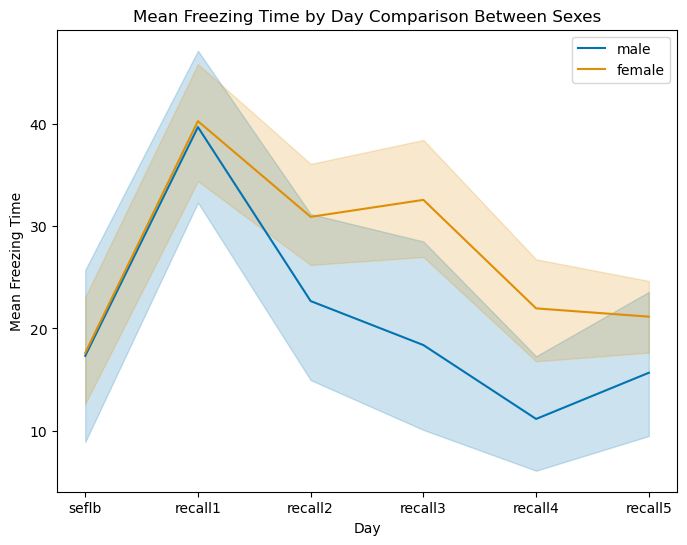

In [116]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=subset_data, x='day', y='freezing', hue='sex', palette="colorblind")
plt.xlabel('Day')
plt.ylabel('Mean Freezing Time')
plt.title('Mean Freezing Time by Day Comparison Between Sexes')
plt.legend()
plt.show()

In [119]:
# ANOVA on freezing time between sex overall
sex_diff = pg.mixed_anova(data=subset_data, dv='freezing', within='day', between='sex', subject='id', effsize="np2")
print("repeated ANOVA for Freezing Time between male vs female:")
print(sex_diff)
print('The required sample size per group n: %.4f' % power_anova(eta_squared=sex_diff['np2'].iloc[0], k=2, power=0.80))

print("There are {first} male rats and {second} female rats in the dataset".format(first=len(subset_data[subset_data['sex']=='male']['id'].value_counts())
, second=len(subset_data[subset_data['sex']=='female']['id'].value_counts())))

repeated ANOVA for Freezing Time between male vs female:
        Source            SS  DF1  DF2           MS          F         p-unc  \
0          sex   2801.265981    1   44  2801.265981   3.475147  6.897750e-02   
1          day  17514.152139    5  220  3502.830428  31.537886  3.686699e-24   
2  Interaction   1667.409566    5  220   333.481913   3.002519  1.211187e-02   

      p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0           NaN  0.073199       NaN        NaN       NaN       NaN  
1  7.946127e-17  0.417511  0.686364      False  0.412234  0.000494  
2           NaN  0.063880       NaN        NaN       NaN       NaN  
The required sample size per group n: 50.6670
There are 17 male rats and 29 female rats in the dataset


/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


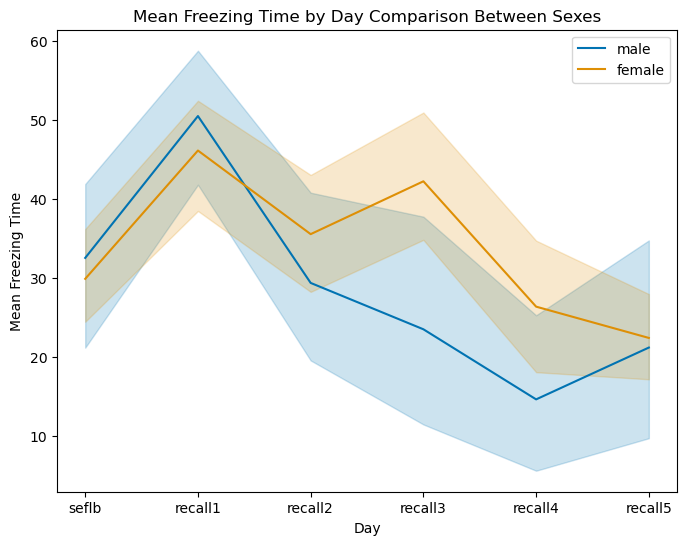

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


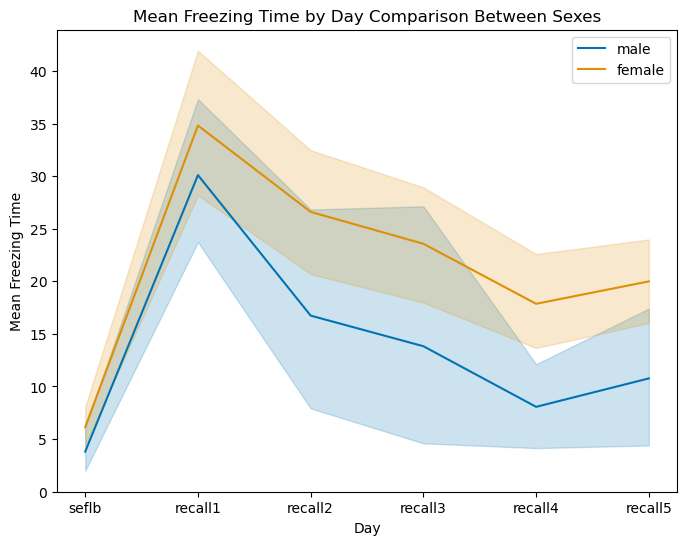

In [118]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=subset_sefl, x='day', y='freezing', hue='sex', palette="colorblind")
plt.xlabel('Day')
plt.ylabel('Mean Freezing Time')
plt.title('Mean Freezing Time by Day Comparison Between Sexes Within Experimental Group')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(data=subset_control, x='day', y='freezing', hue='sex', palette="colorblind")
plt.xlabel('Day')
plt.ylabel('Mean Freezing Time')
plt.title('Mean Freezing Time by Day Comparison Between Sexes Within Control Group')
plt.legend()
plt.show()

In [124]:
# ANOVA on freezing time between sex overall
sex_sefl = pg.mixed_anova(data=subset_sefl, dv='freezing', within='day', between='sex', subject='id', effsize="np2")
print("repeated ANOVA for Freezing Time within Experimental Group between male vs female:")
print(sex_sefl)
print('The required sample size per group n: %.4f' % power_anova(eta_squared=sex_sefl['np2'].iloc[0], k=2, power=0.80))

sex_control = pg.mixed_anova(data=subset_control, dv='freezing', within='day', between='sex', subject='id', effsize="np2")
print("repeated ANOVA for Freezing Time within Experimental Group between male vs female:")
print(sex_control)
print('The required sample size per group n: %.4f' % power_anova(eta_squared=sex_control['np2'].iloc[0], k=2, power=0.80))

print("There are {first} male rats and {second} female rats within sefl groups".format(first=len(subset_sefl[subset_sefl['sex']=='male']['id'].value_counts())
, second=len(subset_sefl[subset_sefl['sex']=='female']['id'].value_counts())))
print("There are {first} male rats and {second} female rats within control groups".format(first=len(subset_control[subset_control['sex']=='male']['id'].value_counts())
, second=len(subset_control[subset_control['sex']=='female']['id'].value_counts())))

repeated ANOVA for Freezing Time within Experimental Group between male vs female:
        Source            SS  DF1  DF2           MS          F         p-unc  \
0          sex    807.244495    1   20   807.244495   1.116670  3.032345e-01   
1          day  10127.557332    5  100  2025.511466  14.671876  8.924324e-11   
2  Interaction   2014.193164    5  100   402.838633   2.917978  1.679596e-02   

   p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0        NaN  0.052881       NaN        NaN       NaN       NaN  
1   0.000002  0.423164  0.545298      False  0.153322  0.001197  
2        NaN  0.127323       NaN        NaN       NaN       NaN  
The required sample size per group n: 71.2613
repeated ANOVA for Freezing Time within Experimental Group between male vs female:
        Source            SS  DF1  DF2           MS          F         p-unc  \
0          sex   1957.669952    1   22  1957.669952   4.785556  3.961283e-02   
1          day  10336.863402    5  110  206